# Logistic Regression

In [1]:
import numpy as np   

import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns


In [2]:
Data=pd.read_csv('titanic-training-data.csv')

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.shape

(891, 12)

In [5]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Boulos, Mr. Hanna",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

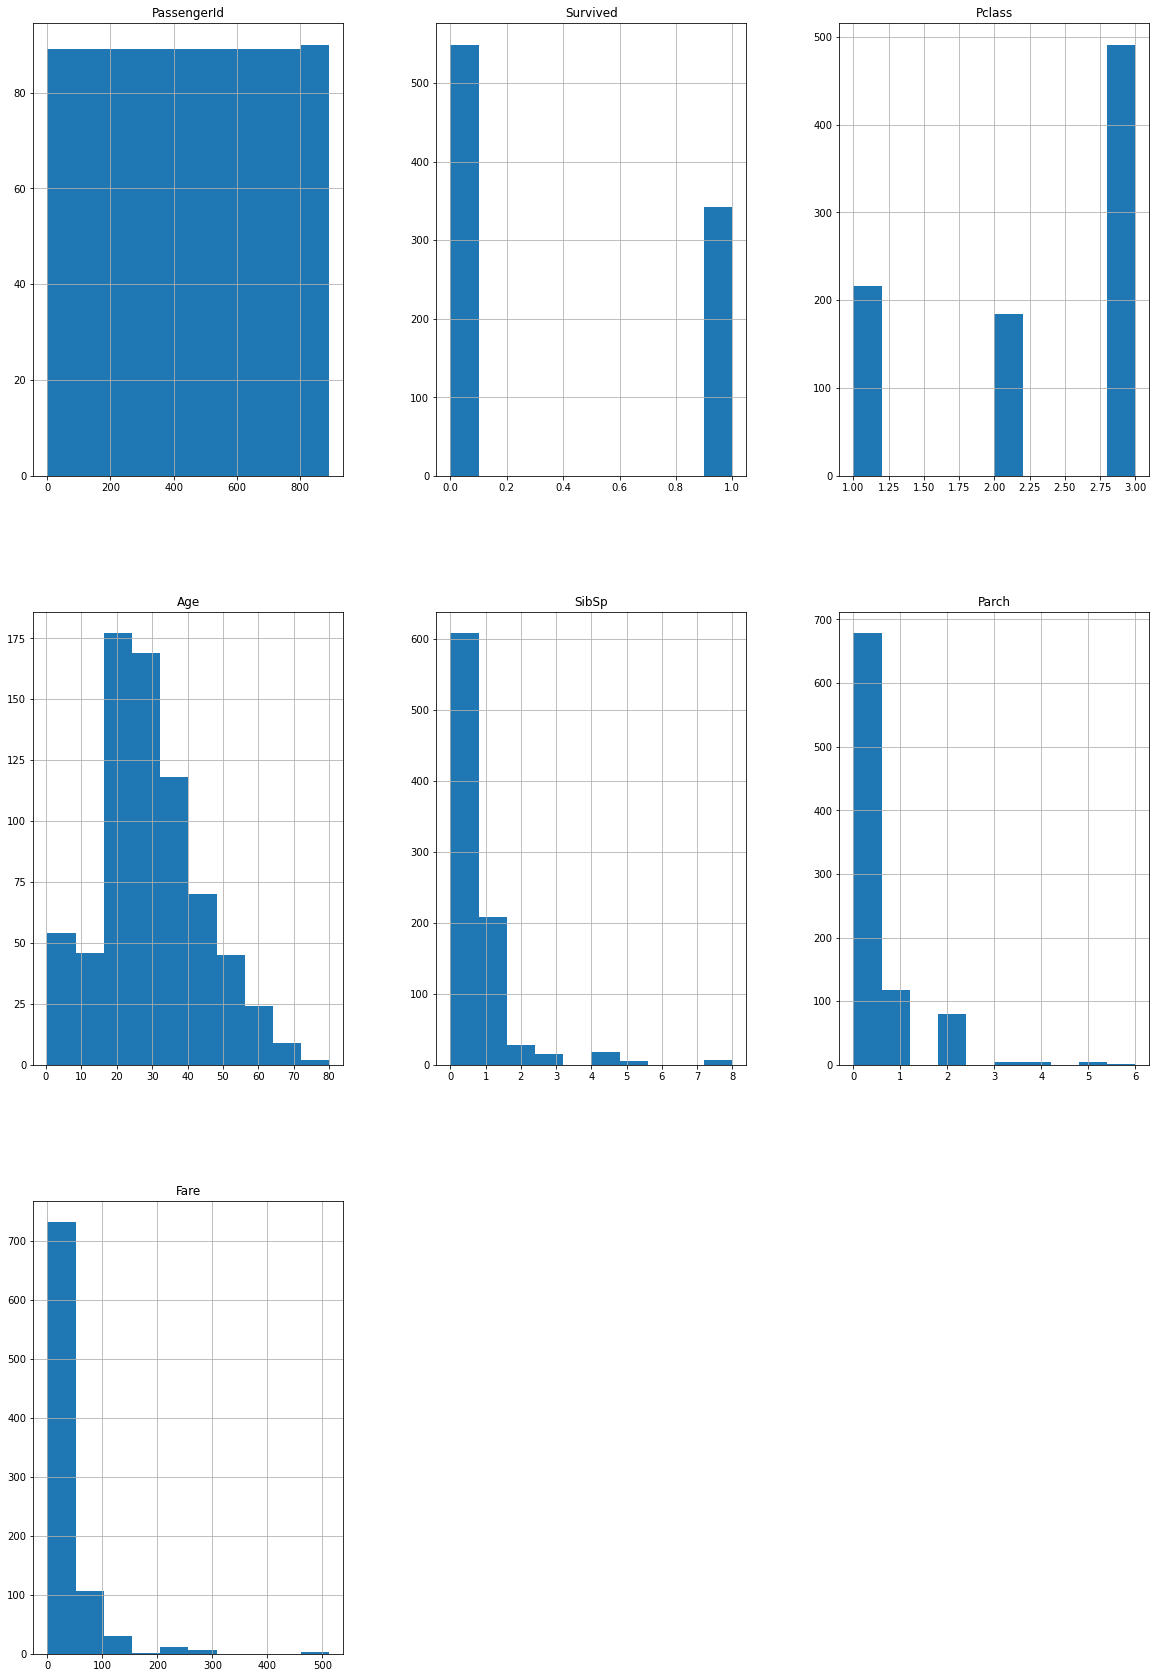

In [9]:
Data.hist(figsize=(20,30))

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

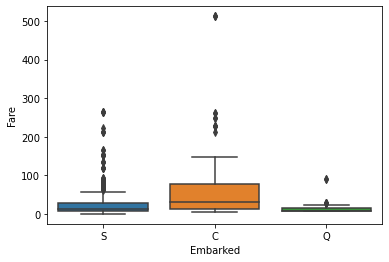

In [10]:
sns.boxplot(x="Embarked", y="Fare", data=Data,)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

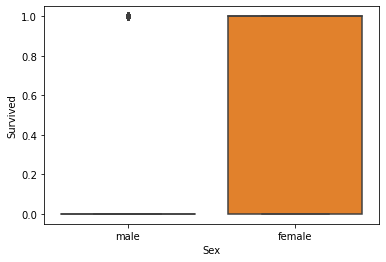

In [11]:
sns.boxplot(x="Sex", y="Survived", data=Data)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

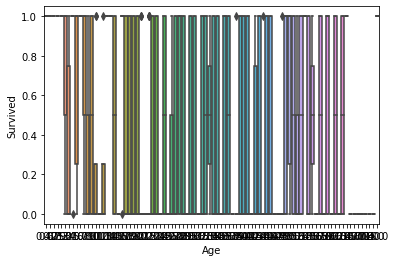

In [12]:
sns.boxplot(x="Age", y="Survived", data=Data)

In [13]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

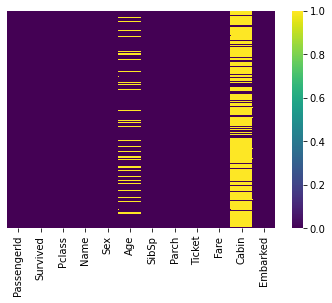

In [14]:
sns.heatmap(Data.isnull(),yticklabels=False,cmap='viridis')

In [15]:
Data.drop('Cabin',axis=1,inplace=True)  #inplace for not defining Data again 

In [16]:
Data.dropna(inplace=True)

<AxesSubplot:>

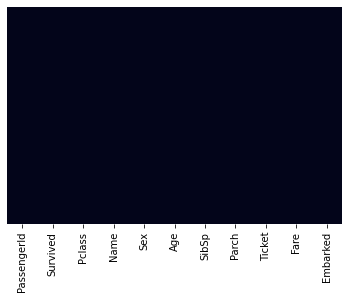

In [17]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False)

In [18]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
Data.shape

(712, 11)

In [21]:
Sex=pd.get_dummies(Data['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
Sex=pd.get_dummies(Data['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
pcl=pd.get_dummies(Data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
embark=pd.get_dummies(Data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
Data=pd.concat([Data,Sex,embark,pcl],axis=1)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [26]:
Data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Fare','Pclass'],axis=1,inplace=True)
Data.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [27]:
#plt.scatter(Data.Age,Data.Survived,marker='+',color='red')

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
x=Data.drop('Survived',axis=1)
y=Data['Survived']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions=model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7757009345794392

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.73      0.73      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 24,  64]], dtype=int64)

<AxesSubplot:>

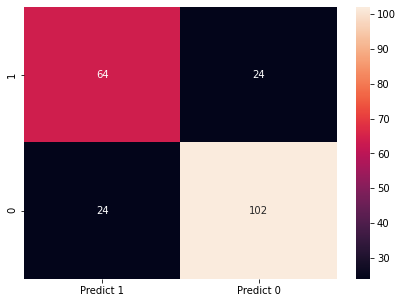

In [36]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])

Data_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(Data_cm,annot=True,fmt='g')

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

# Score

In [39]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.9598393574297188
0.7570093457943925


In [40]:
dTree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [41]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.9598393574297188
0.7570093457943925


# Regularization

In [42]:
dTreeR=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(x_train,y_train)
print(dTreeR.score(x_train,y_train))
print(dTreeR.score(x_test,y_test))

0.8192771084337349
0.7897196261682243


In [43]:
dTreeR=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
dTreeR.fit(x_train,y_train)
print(dTreeR.score(x_train,y_train))
print(dTreeR.score(x_test,y_test))

0.8192771084337349
0.7897196261682243


0.7897196261682243


<AxesSubplot:>

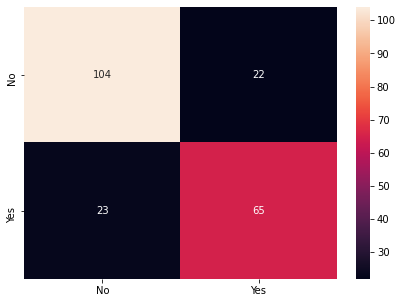

In [44]:
y_predict = dTreeR.predict(x_test)
print(dTreeR.score(x_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,base_estimator=dTree,random_state=1)

bgcl = bgcl.fit(x_train,y_train)


0.7616822429906542


<AxesSubplot:>

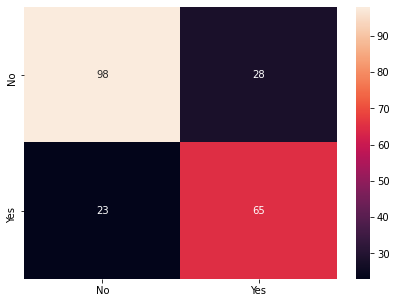

In [57]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30,random_state=1)

abcl = abcl.fit(x_train,y_train)


0.7850467289719626


<AxesSubplot:>

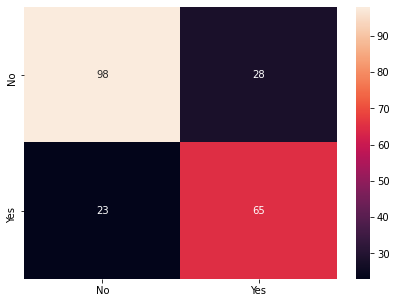

In [48]:
y_predict = bgcl.predict(x_test)
print(abcl.score(x_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators=10,random_state=1)

gbcl = gbcl.fit(x_train,y_train)

0.8037383177570093


<AxesSubplot:>

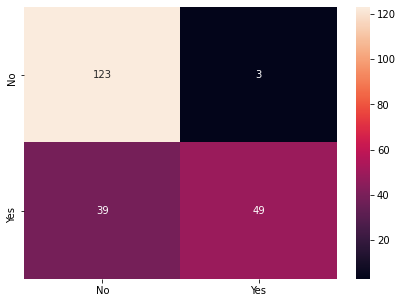

In [50]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

In [51]:
from sklearn. metrics import roc_auc_score,auc
from sklearn. metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, abcl.predict_proba(x_test) [:, 1])

In [52]:
logit_roc_auc1=roc_auc_score(y_test,abcl.predict(x_test))
roc_auc1 = auc(fpr1, tpr1)

In [53]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, gbcl.predict_proba(x_test) [:, 1])
logit_roc_auc2=roc_auc_score(y_test,gbcl.predict(x_test))
roc_auc2 = auc(fpr2, tpr2)

<Figure size 432x288 with 0 Axes>

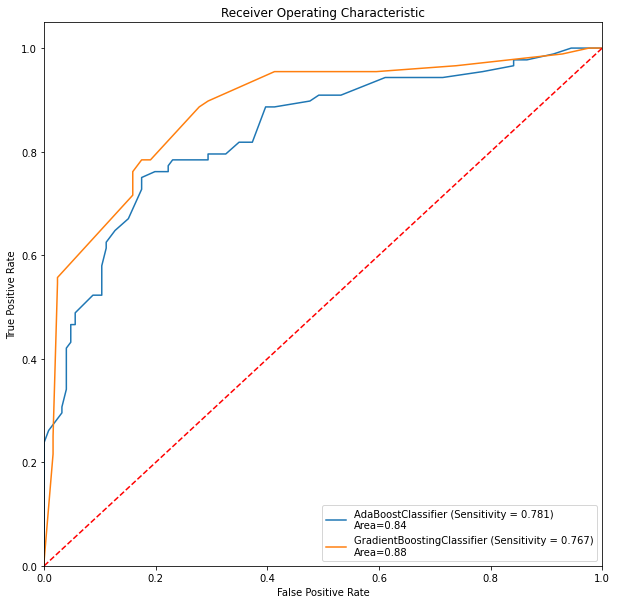

In [54]:
import matplotlib.pyplot as plt
plt.figure( )
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label= 'AdaBoostClassifier (Sensitivity = %0.3f)' % logit_roc_auc1 + "\nArea=%0.2f" % roc_auc1)
plt.plot(fpr2, tpr2, label= 'GradientBoostingClassifier (Sensitivity = %0.3f)' % logit_roc_auc2 + "\nArea=%0.2f" % roc_auc2)
plt.plot ([0, 1], [0, 1], 'r--' )
plt.xlim( [0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title('Receiver Operating Characteristic' )
plt.legend (loc="lower right")
#plt.savefig ( 'Log_ROC')
 
plt.show( )

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50,max_features=3)
rfcl=rfcl.fit(x_train,y_train)

In [112]:
y_predict=rfcl.predict(x_test)
print(rfcl.score(x_test,y_test))
                      

0.7897196261682243
